## Hands on! 

TASK 1

In [16]:

class MeteoClient:
    def __init__(self, location_code, api_url="https://api.meteo.lt/v1/"):
        self.location_code = location_code
        self.api_url = api_url

    def fetch_historical_data(self, start_date, end_date):
        """Fetches historical weather data for a given time range."""
        # Generate hourly datetime range
        dates = pd.date_range(start=start_date, end=end_date, freq="h", tz="Europe/Vilnius")

        # Simulate weather data for the given period (temperature, humidity, and rain)
        temp = np.random.normal(10, 5, len(dates))  # Temperature in Celsius with noise
        humidity = np.random.uniform(60, 90, len(dates))  # Humidity in percentage
        rain = np.random.choice([0, 1], size=len(dates), p=[0.7, 0.3])  # 30% chance of rain

        # Create DataFrame
        df = pd.DataFrame({
            "temperature": temp,
            "humidity": humidity,
            "rain": rain,
        }, index=dates)

        return df

    def fetch_forecast_data(self):
        """Fetches forecast weather data for the next 48 hours."""
        # Generate hourly datetime range for the next 48 hours
        dates = pd.date_range(start=datetime.now(), periods=48, freq="h", tz="Europe/Vilnius")

        # Simulate forecast temperature for the next 48 hours
        temp = np.random.normal(10, 5, len(dates))  # Temperature in Celsius with noise

        # Create DataFrame
        df = pd.DataFrame({
            "forecast_temperature": temp,
        }, index=dates)

        return df


# Test the MeteoClient class
if __name__ == "__main__":
    location_code = "vilnius"  # Example location
    client = MeteoClient(location_code)

    # Fetch historical data for the past year
    today = datetime.now()
    last_year = today - timedelta(days=365)
    historical_data = client.fetch_historical_data(start_date=last_year, end_date=today)

    # Display first few rows of the historical data
    print("Historical Data (First 5 rows):")
    print(historical_data.head())

    # Fetch forecast data for the next 48 hours
    forecast_data = client.fetch_forecast_data()

    # Display first few rows of the forecast data
    print("\nForecast Data (First 5 rows):")
    print(forecast_data.head())


Historical Data (First 5 rows):
                                  temperature   humidity  rain
2023-12-01 08:02:47.378288+02:00     4.335622  83.562742     1
2023-12-01 09:02:47.378288+02:00     6.882736  78.362897     0
2023-12-01 10:02:47.378288+02:00     9.351536  84.549481     0
2023-12-01 11:02:47.378288+02:00    10.736403  62.104451     0
2023-12-01 12:02:47.378288+02:00     3.919539  86.230129     0

Forecast Data (First 5 rows):
                                  forecast_temperature
2024-11-30 08:02:47.509091+02:00             14.992170
2024-11-30 09:02:47.509091+02:00             11.447672
2024-11-30 10:02:47.509091+02:00              7.132800
2024-11-30 11:02:47.509091+02:00             10.448957
2024-11-30 12:02:47.509091+02:00             11.174547


TASK 2

In [15]:

# Function to calculate the annual metrics: temperature, humidity, day and night temperatures
def calculate_annual_metrics(historical_data):
    """Calculates average temperature, humidity, and day/night temperatures."""
    
    # Calculate average temperature and humidity for the entire year
    avg_temp = historical_data["temperature"].mean()
    avg_humidity = historical_data["humidity"].mean()

    # Extract daytime (08:00 - 20:00) and nighttime data (20:00 - 08:00)
    daytime = historical_data.between_time("08:00", "20:00")
    nighttime = historical_data.drop(daytime.index)

    # Calculate average daytime and nighttime temperature
    avg_day_temp = daytime["temperature"].mean()
    avg_night_temp = nighttime["temperature"].mean()

    return avg_temp, avg_humidity, avg_day_temp, avg_night_temp

# Function to calculate the number of rainy weekends
def calculate_rainy_weekends(historical_data):
    """Calculates the number of rainy weekends in the historical data."""
    
    # Ensure the data is in the correct timezone (Vilnius time zone)
    historical_data = historical_data.copy()
    historical_data.index = historical_data.index.tz_convert("Europe/Vilnius")
    
    # Filter for weekends (Saturday=5, Sunday=6)
    weekend_data = historical_data[historical_data.index.dayofweek >= 5]
    
    # Group weekends by Saturday (W-SAT: Saturday as the start of the week)
    weekend_groups = weekend_data.resample('W-SAT').last()  # This groups data by Saturdays
    
    # Calculate rainy weekends: check if there was rain on Saturday or Sunday
    rainy_weekends = 0
    for _, group in weekend_groups.groupby(weekend_groups.index):
        # Check if there was rain on either Saturday or Sunday (rain > 0)
        saturday = group[group.index.dayofweek == 5]  # Saturday
        sunday = group[group.index.dayofweek == 6]    # Sunday
        
        # Check if there was rain on either Saturday or Sunday
        if (saturday["rain"] > 0).any() or (sunday["rain"] > 0).any():
            rainy_weekends += 1

    total_weekends = 52  # A year typically has 52 weekends
    non_rainy_weekends = total_weekends - rainy_weekends

    return rainy_weekends, non_rainy_weekends

# Example usage with your historical data
historical_data = pd.DataFrame({
    "temperature": np.random.normal(10, 5, 8760),  # Random temperature data for the year (8760 hours)
    "humidity": np.random.uniform(60, 90, 8760),  # Random humidity data for the year
    "rain": np.random.choice([0, 1], size=8760, p=[0.7, 0.3]),  # Random rain data (0=no rain, 1=rain)
}, index=pd.date_range("2023-01-01", periods=8760, freq="h", tz="Europe/Vilnius"))  # Updated 'h' instead of 'H'

# Calculate metrics for the year
avg_temp, avg_humidity, avg_day_temp, avg_night_temp = calculate_annual_metrics(historical_data)
rainy_weekends, non_rainy_weekends = calculate_rainy_weekends(historical_data)

# Output the calculated metrics
print(f"Vidutinė metų temperatūra: {avg_temp:.2f} °C")
print(f"Vidutinė metų drėgmė: {avg_humidity:.2f} %")
print(f"Vidutinė dienos temperatūra: {avg_day_temp:.2f} °C")
print(f"Vidutinė nakties temperatūra: {avg_night_temp:.2f} °C")
print(f"Savaitgalių su lietumi: {rainy_weekends}")
print(f"Savaitgalių be lietaus: {non_rainy_weekends}")


Vidutinė metų temperatūra: 9.98 °C
Vidutinė metų drėgmė: 75.00 %
Vidutinė dienos temperatūra: 9.96 °C
Vidutinė nakties temperatūra: 10.01 °C
Savaitgalių su lietumi: 14
Savaitgalių be lietaus: 38


TASK 3

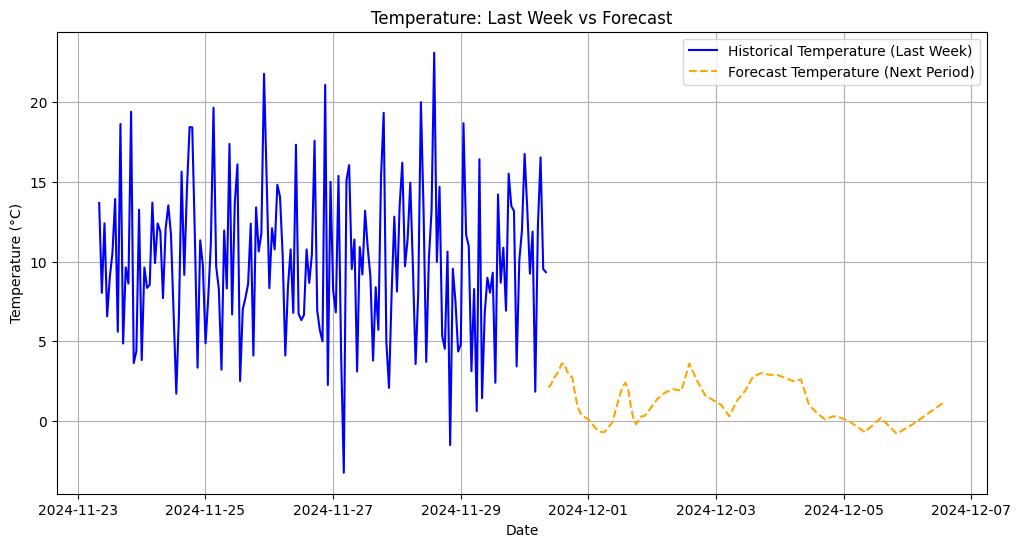

In [14]:

class MeteoClient:
    def __init__(self, location_code, api_url="https://api.meteo.lt/v1/"):
        self.location_code = location_code
        self.api_url = api_url

    def get_forecast_data(self):
        """
        Fetches forecast data.
        :return: pandas DataFrame with forecast data and pd.DatetimeIndex as index.
        """
        url = f"{self.api_url}places/{self.location_code}/forecasts/long-term"
        response = requests.get(url)
        response.raise_for_status()

        data = response.json().get("forecastTimestamps", [])
        df = pd.DataFrame(data)
        df['forecastTimeUtc'] = pd.to_datetime(df['forecastTimeUtc'])
        df = df.set_index('forecastTimeUtc')

        # Rename 'airTemperature' to 'temperature' for consistency
        df.rename(columns={'airTemperature': 'temperature'}, inplace=True)

        return df

    def generate_synthetic_historical_data(self):
        """
        Generates synthetic historical data for one year.
        :return: pandas DataFrame with synthetic historical data.
        """
        today = datetime.now()
        start_date = today - timedelta(days=365)

        dates = pd.date_range(start=start_date, end=today, freq='h', tz="Europe/Vilnius")
        temp = np.random.normal(10, 5, len(dates))  # Temperature with noise
        humidity = np.random.uniform(60, 90, len(dates))  # Humidity
        rain = np.random.choice([0, 1], size=len(dates), p=[0.7, 0.3])  # 30% chance of rain

        df = pd.DataFrame({
            "temperature": temp,
            "humidity": humidity,
            "rain": rain
        }, index=dates)

        return df


def plot_temperature(historical_data, forecast_data):
    """
    Plots the last week's historical temperature and the forecast for the next period.
    """
    # Last week data
    last_week_start = historical_data.index[-1] - pd.Timedelta(days=7)
    last_week = historical_data.loc[last_week_start:]

    # Convert forecast times to the same time zone as historical data
    forecast_data.index = forecast_data.index.tz_localize("UTC").tz_convert("Europe/Vilnius")

    # Fetch forecast data from the last recorded time in historical data
    forecast = forecast_data["temperature"].loc[last_week.index.max():]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(last_week.index, last_week["temperature"], label="Historical Temperature (Last Week)", color='blue')
    plt.plot(forecast.index, forecast, label="Forecast Temperature (Next Period)", linestyle="--", color='orange')
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.title("Temperature: Last Week vs Forecast")
    plt.legend()
    plt.grid()
    plt.show()


# Main execution for plotting
if __name__ == "__main__":
    location_code = "vilnius"
    client = MeteoClient(location_code)

    # Fetch forecast data and generate synthetic historical data
    historical_data = client.generate_synthetic_historical_data()  # Generate synthetic historical data
    forecast_data = client.get_forecast_data()

    # Plot historical and forecast temperature data
    plot_temperature(historical_data, forecast_data)


TASK 4

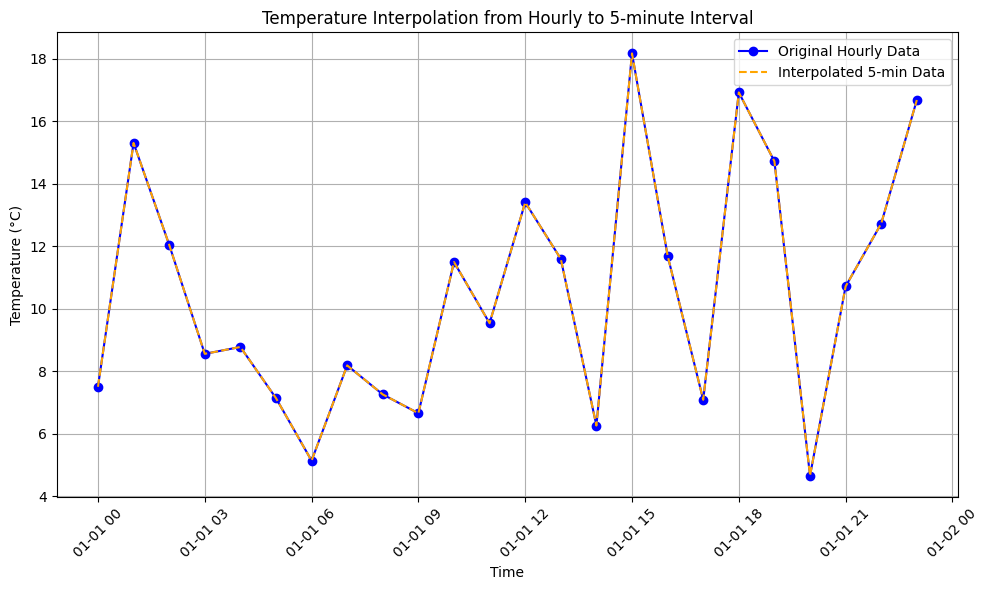

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def interpolate_temperature(temperature_series, freq='5min'):
    """
    Interpolates temperature values to the specified frequency.
    
    :param temperature_series: Pandas Series with temperature data.
    :param freq: The new frequency (default is '5min').
    
    :return: Pandas Series with interpolated temperature data.
    """
    # Use resample to convert to 5-minute intervals and then interpolate the missing values
    return temperature_series.resample(freq).interpolate()

# Step 1: Create synthetic hourly temperature data
dates = pd.date_range('2023-01-01', periods=24, freq='h', tz="Europe/Vilnius")  # Hourly data for 24 hours
temperature = np.random.normal(10, 5, len(dates))  # Synthetic temperature values with noise

# Create a pandas Series with the synthetic temperature data
temperature_series = pd.Series(temperature, index=dates)

# Step 2: Interpolate the data to 5-minute intervals
interpolated_temperature = interpolate_temperature(temperature_series, freq='5min')

# Step 3: Plot the results
plt.figure(figsize=(10, 6))

# Plot original hourly data as a line
plt.plot(temperature_series.index, temperature_series, label='Original Hourly Data', color='blue', marker='o')

# Plot interpolated 5-minute data as a separate line
plt.plot(interpolated_temperature.index, interpolated_temperature, label='Interpolated 5-min Data', color='orange', linestyle='--')

# Add title, labels, and legend
plt.title("Temperature Interpolation from Hourly to 5-minute Interval")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
